In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [12]:
questions = [
    "Find the greatest $(M)$ and least $(m)$ values of the following functions in the indicated intervals (i) $f(x)=x e^{-x}$ on $[0, \infty)$ (ii) $f(x)=\sqrt{ }\left(1-x^{2}\right)\left(1+2 x^{2}\right)$ on $[-1,1]$",
    "Find the greatest least values of the functions (i) $f(x)=\arctan x-\frac{1}{2} \ln x$ on $\left[\frac{1}{\sqrt{3}}, \sqrt{3}\right]$ (ii) $f(x)=2 \sin x+\sin 2 x$ on $\left[0, \frac{3 \pi}{2}\right]$ (iii) $f(x)= \begin{cases}2 x^{2}+\frac{2}{x^{2}} ; & -2 \leq x<0 ; 0<x \leq 2 \\ 1 ; & x=0\end{cases}$ (iv) $f(x)=x-2 \ln x$ on [1, e]",
    "Find the local maxima/local minima of the function $f(x)$ and also the image of interval (i) $[0,3]$ (ii) $[0,4]$ under the mapping $f(x)=x^{5}-5 x^{4}+5 x^{3}+1$.",
    "Find the points of local maxima and local minima of the function $f(x)=(x-1)^{3}(x+1)^{2}$. Find also the local maximum and local minimum values.",
    "Using the first derivative, find the extrema of the function $f(x)=\frac{x^{2}-3 x+2}{x^{2}+2 x+1}$",
    "Find the extrema of function $f(x)=\sqrt[3]{(x-1)^{2}}+\sqrt[3]{(x+1)^{2}}$.",
    "The function $f(x)=x^{3}+a x^{2}+b x+c, a^{2} \leq 3 b$ has (a) one maximum value (b) one minimum value (c) no extreme value (d) one maximum and one minimum value",
    "If $y=\frac{\sin (x+a)}{\sin (x+b)}, a \neq b$, then $y$ has (a) minima at $x=0$ (b) maxima at $x=0$ (c) neither minima nor maxima at $x=0$ (d) None of the above",
    "The difference between the greatest and least values of function $f(x)=\cos x+\frac{1}{2} \cos 2 x-\frac{1}{3} \cos 3 x$ is (a) $\frac{2}{3}$ (b) $\frac{8}{7}$ (c) $\frac{3}{8}$ (d) $\frac{9}{4}$",
    "The minimum value of $x^{2}+\frac{1}{1+x^{2}}$ is at (a) $x=0$ (b) $x=1$ (c) $x=4$ (d) $x=3$",
    "The minimum value of $e^{\left(2 x^{2}-2 x+1\right) \sin ^{2} x}$ is (a) 0 (b) 1 (c) 2 (d) 3",
    "The absolute maximum of $x^{40}-x^{20}$ on the interval $[0,1]$ is (a) $-\frac{1}{4}$ (b) 0 (c) $\frac{1}{4}$ (d) $\frac{1}{2}$",
    "The extreme values of $4 \cos \left(x^{2}\right) \cos \left(\frac{\pi}{3}+x^{2}\right) \cos \left(\frac{\pi}{3}-x^{2}\right)$ over $R$, are (a) $-1,1$ (b) $-2,2$ (c) $-3,3$ (d) $-4,4$",
    "The maximum value $x^{1 / x}$ is (a) $1 / \mathrm{e}^{\mathrm{e}}$ (b) $e$ (c) $e^{1 / e}$ (d) $1 / e$",
    "The largest value of $2 x^{3}-3 x^{2}-12 x+5$ for $-2 \leq x \leq 4$ occurs at $x$ equals to (a) -4 (b) 0 (c) 1 (d) 4",
    "The minimum value of $4 e^{2 x}+9 e^{-2 x}$ is (a) 11 (b) 12 (c) 10 (d) 14",
    "If the largest term in the sequence $a_{n}=\frac{n^{2}}{\left(n^{3}+100\right)^{2}}$ is $a_{\alpha}$, then $\alpha$ is $\qquad$",
    "The function $f(x)=\int_{-1}^{x} t\left(e^{t}-1\right)(t-1)(t-2)^{3} d t$ has $m$ number of local maxima and $n$ number at local minima, then $|m-n|$ is (a) 1 (b) 2 (c) 3 (d) 4",
    "Let the function $f(x)$ be defined as $f(x)=\left\{\begin{array}{cc}\tan ^{-1} \alpha-3 x^{2}, & 0<x<1 \\ -6 x, & x \geq 1\end{array} . f(x)\right.$ can have a maximum at $x=1$. If the value of $\alpha$ is (a) 0 (b) 2 (c) 1 (d) None of these"
]

In [13]:
len(questions)

19

In [5]:
model = SentenceTransformer("BAAI/bge-m3")

In [14]:
embeddings = model.encode(questions)

In [15]:
# Cluster using KMeans
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

In [16]:
# Find central question in each cluster
representatives = []
for cluster_id in range(n_clusters):
    idxs = [i for i, label in enumerate(labels) if label == cluster_id]
    cluster_embeddings = [embeddings[i] for i in idxs]
    sims = cosine_similarity([kmeans.cluster_centers_[cluster_id]], cluster_embeddings)
    central_idx = idxs[np.argmax(sims)]
    representatives.append((cluster_id, questions[central_idx]))

In [25]:
print("Representative Questions from Each Cluster:\n")
for cluster_id, question in representatives:
    fixed_question = question.encode('unicode_escape').decode()
    print(f"Cluster {cluster_id}: {fixed_question}")

Representative Questions from Each Cluster:

Cluster 0: If $y=\x0crac{\\sin (x+a)}{\\sin (x+b)}, a \neq b$, then $y$ has (a) minima at $x=0$ (b) maxima at $x=0$ (c) neither minima nor maxima at $x=0$ (d) None of the above
Cluster 1: Let the function $f(x)$ be defined as $f(x)=\\left\\{\x08egin{array}{cc}\tan ^{-1} \x07lpha-3 x^{2}, & 0<x<1 \\ -6 x, & x \\geq 1\\end{array} . f(x)\right.$ can have a maximum at $x=1$. If the value of $\x07lpha$ is (a) 0 (b) 2 (c) 1 (d) None of these
Cluster 2: Find the greatest least values of the functions (i) $f(x)=\x07rctan x-\x0crac{1}{2} \\ln x$ on $\\left[\x0crac{1}{\\sqrt{3}}, \\sqrt{3}\right]$ (ii) $f(x)=2 \\sin x+\\sin 2 x$ on $\\left[0, \x0crac{3 \\pi}{2}\right]$ (iii) $f(x)= \x08egin{cases}2 x^{2}+\x0crac{2}{x^{2}} ; & -2 \\leq x<0 ; 0<x \\leq 2 \\ 1 ; & x=0\\end{cases}$ (iv) $f(x)=x-2 \\ln x$ on [1, e]
Cluster 3: If the largest term in the sequence $a_{n}=\x0crac{n^{2}}{\\left(n^{3}+100\right)^{2}}$ is $a_{\x07lpha}$, then $\x07lpha$ is $\\qqu

In [9]:
# Visualize with t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
reduced = tsne.fit_transform(embeddings)
df_viz = pd.DataFrame({
    "x": reduced[:, 0],
    "y": reduced[:, 1],
    "label": labels,
    "question": questions
})

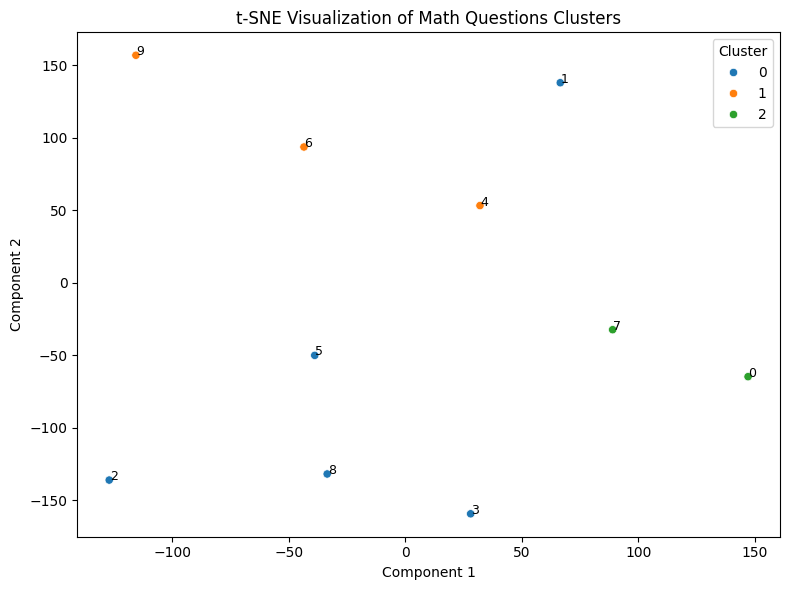

In [10]:
# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_viz, x="x", y="y", hue="label", palette="tab10")
for i in range(len(df_viz)):
    plt.text(df_viz["x"][i] + 0.2, df_viz["y"][i], str(i), fontsize=9)
plt.title("t-SNE Visualization of Math Questions Clusters")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [18]:
df_clusters = pd.DataFrame({
    "Question": questions,
    "Cluster": labels
})

In [19]:
pd.set_option("display.max_colwidth", 60)
print(df_clusters.sort_values("Cluster"))

                                                       Question  Cluster
7   If $y=rac{\sin (x+a)}{\sin (x+b)}, a \neq b$, then $y$ ...        0
18  Let the function $f(x)$ be defined as $f(x)=\left\egin...        1
14  The largest value of $2 x^{3}-3 x^{2}-12 x+5$ for $-2 \l...        1
13  The maximum value $x^{1 / x}$ is (a) $1 / \mathrm{e}^{\m...        1
11  The absolute maximum of $x^{40}-x^{20}$ on the interval ...        1
6   The function $f(x)=x^{3}+a x^{2}+b x+c, a^{2} \leq 3 b$ ...        1
12  The extreme values of $4 \cos \left(x^{2}\right) \cos \l...        2
10  The minimum value of $e^{\left(2 x^{2}-2 x+1\right) \sin...        2
0   Find the greatest $(M)$ and least $(m)$ values of the fo...        2
4   Using the first derivative, find the extrema of the func...        2
1   Find the greatest least values of the functions (i) $f(x...        2
8   The difference between the greatest and least values of ...        2
9   The minimum value of $x^{2}+rac{1}{1+x^{2}}$ is 